# Question 4

In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import random
from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d

## part a

In [24]:
# Do not change this cell
image = cv2.imread('cat.png',cv2.IMREAD_GRAYSCALE)

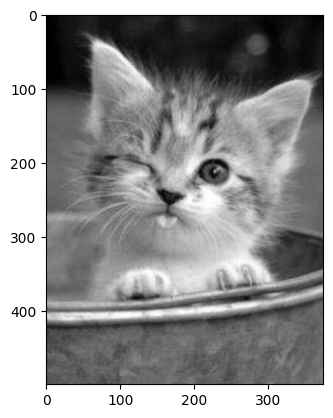

In [16]:
plt.imshow(image,cmap='gray')

In [25]:
def Add_Noise(img):
    """
    Add salt and pepper noise to the input image.
        Parameters:
          img: Input image (numpy array).
        Returns:
          Image with salt and pepper noise added.
    """

    # Determine the number of pixels to be affected by salt and pepper noise
    num_pixels = img.size

    # Use 30% of the total number of pixels as the noise level
    noise_level = 0.3
    num_salt = int(num_pixels * noise_level / 2)  # Half of the noise level for salt
    num_pepper = int(num_pixels * noise_level / 2)  # Half of the noise level for pepper

    # Generate random coordinates for salt noise
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape]

    # Set the pixel values at the salt coordinates to maximum intensity (255)
    img[salt_coords[0], salt_coords[1]] = 255

    # Generate random coordinates for pepper noise
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in img.shape]

    # Set the pixel values at the pepper coordinates to minimum intensity (0)
    img[pepper_coords[0], pepper_coords[1]] = 0

    return img

(-0.5, 374.5, 499.5, -0.5)

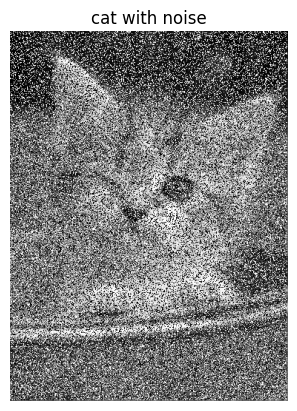

In [27]:
image = Add_Noise(image)
plt.imshow(image,cmap='gray')
plt.title("cat with noise")
plt.axis("off")

# part b

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it before blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [69]:
def Reflect101(img,filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''

  #######################
  #    your code here   #
  pad_width = filter_size // 2
  reflected_img = np.pad(img, pad_width, mode='reflect')
  return reflected_img
  #######################

  return reflected_img

In [70]:
def Averaging_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed averaging blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))

  #######################
  #    your code here   #

  # Calculate the kernel by dividing each element by the total number of elements in the kernel
  kernel = np.ones((filter_size, filter_size)) / (filter_size ** 2)

  # Convolve the image with the kernel
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          result[i, j] = np.sum(image[i:i+filter_size, j:j+filter_size] * kernel)

  return result
  #######################

  return result

In [71]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))

  #######################
  #    your code here   #
  image = np.array(image)
  # Convolve the image with the filter
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          result[i, j] = np.median(image[i:i+filter_size, j:j+filter_size])

  return result
  #######################

  return result

In [72]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    kernel = np.zeros((filter_size,filter_size))
    #######################
    #    your code here   #
    m = filter_size
    n = filter_size
    for x in range(-m // 2, m // 2 + 1):
        for y in range(-n // 2, n // 2 + 1):
            kernel[x + m // 2, y + n // 2] = np.exp(-(x ** 2 + y ** 2) / (2 * std ** 2))
    kernel /= np.sum(kernel)

    # Apply Reflect101 padding to the image
    image = Reflect101(img, filter_size)
    image = np.array(image)
    result = np.zeros_like(img)

    # Convolve the image with the kernel
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            result[i, j] = np.sum(image[i:i+m, j:j+n] * kernel)
    #######################
    output = result.copy()
    result = cv2.filter2D(src = output, ddepth = -1, kernel = kernel)
    return result

(-0.5, 374.5, 499.5, -0.5)

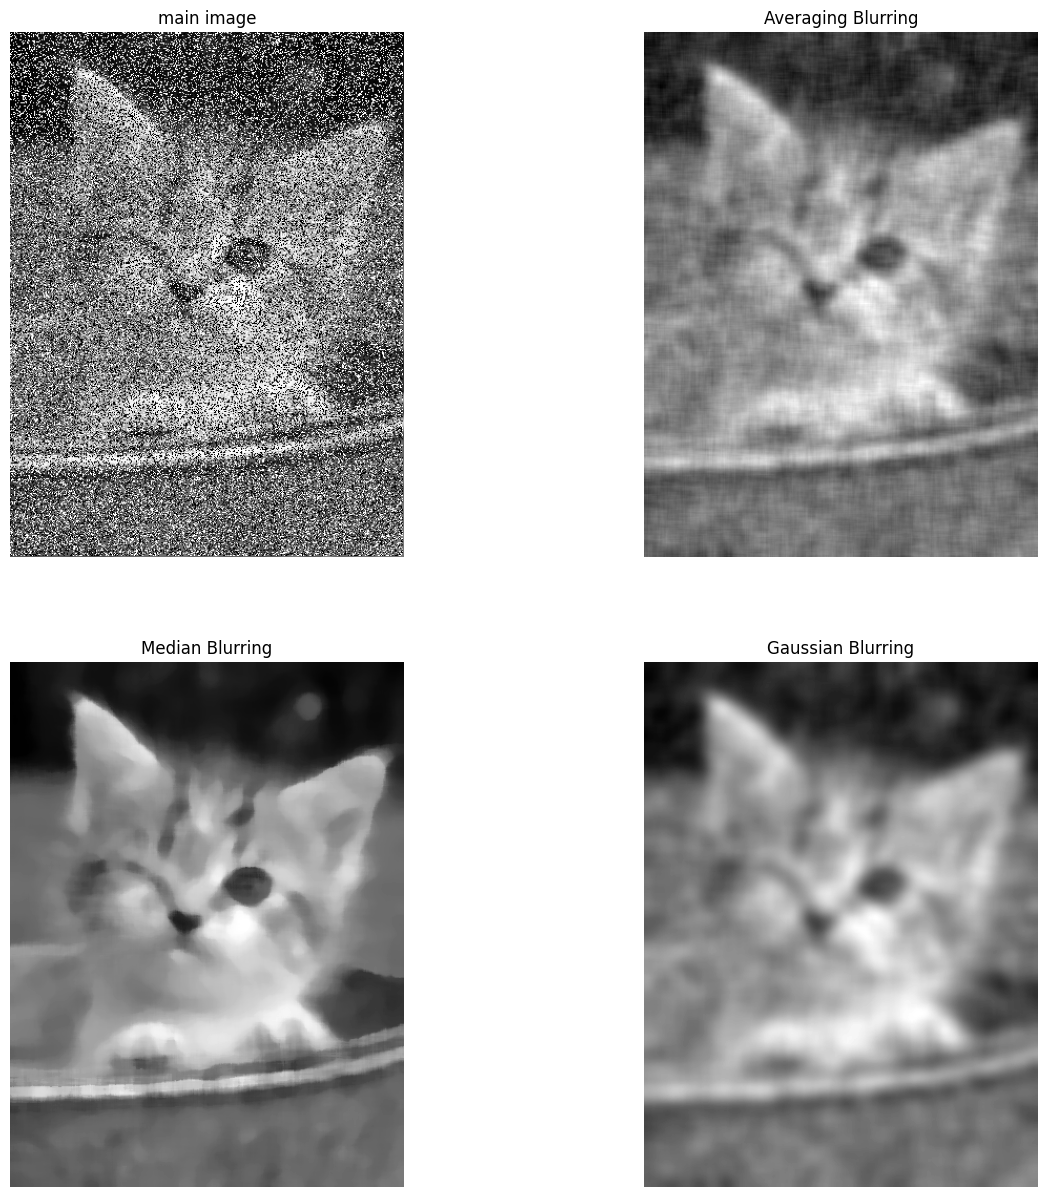

In [73]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [43]:
# Perform Averaging Blurring
AveragingBlurring = cv2.blur(image, (15, 15))

# Perform Median Blurring
MedianBlurring = cv2.medianBlur(image, 15)

# Perform Gaussian Blurring
GaussianBlurring = cv2.GaussianBlur(image, (15, 15), 40)

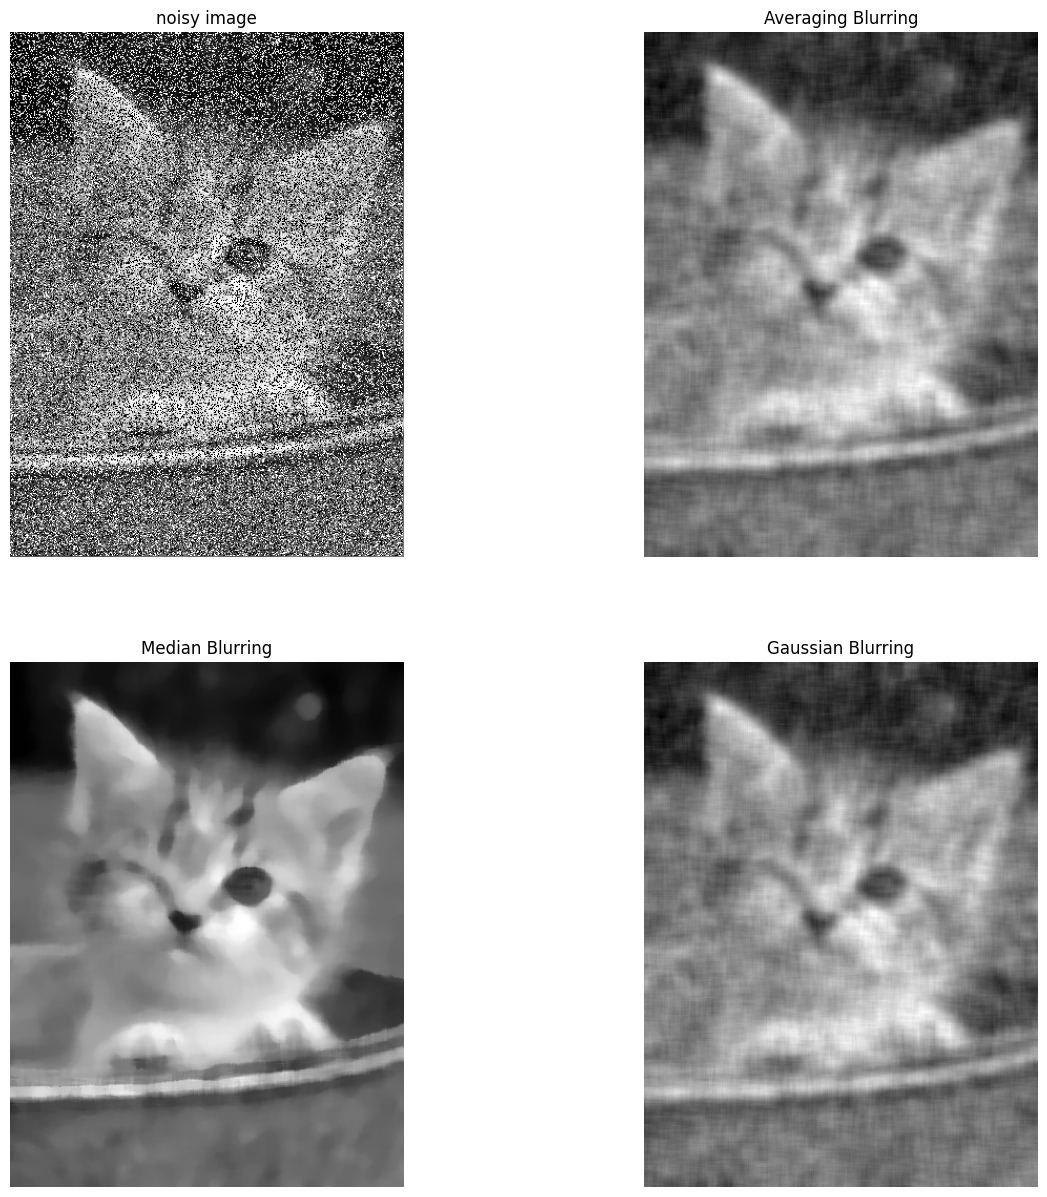

In [44]:
# Do not change this cell
Array = [image, AveragingBlurring, MedianBlurring, GaussianBlurring]
titles = ['noisy image', 'Averaging Blurring', 'Median Blurring', 'Gaussian Blurring']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")